# Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis =1)
y = df["sales"]

### Polynomial Conversion

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape

(200, 55)

### Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [13]:
X_test = scaler.transform(X_test)
X_test

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [14]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
pd.DataFrame(X_test).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = lm.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [20]:
y_train_pred = lm.predict(X_train)

In [21]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9976072485267145
MAE 		: 0.18621293136504957
MSE 		: 0.06296801889161928
RMSE 		: 0.25093429198022993


In [22]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7649897681643356
MAE 		: 0.6659594307588336
MSE 		: 6.634847380750249
RMSE 		: 2.5758197492740535


In [23]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

,lm_train,lm_test
rmse,0.250934,2.575820
mae,0.186213,0.665959
mse,0.062968,6.634847
R2,0.997607,0.764990


## Multicolineratiy

In [24]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [25]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

## Cross Validate

In [26]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted']

In [27]:
from sklearn.model_selection import cross_validate, cross_val_score

In [28]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [29]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.006997,0.001994,-0.280734,-1.994430,-31.328119,-5.597153
2,0.005001,0.002001,0.993019,-0.377066,-0.250648,-0.500647
3,0.005995,0.003004,0.983934,-0.392312,-0.306241,-0.553391
4,0.003992,0.002016,0.825272,-0.979767,-4.402358,-2.098180
5,0.003994,0.001997,0.991181,-0.322253,-0.166869,-0.408496
6,0.003997,0.002006,0.969012,-0.484493,-0.976815,-0.988339
7,0.003998,0.002004,0.992885,-0.327955,-0.144808,-0.380536
8,0.003991,0.002000,0.990130,-0.447015,-0.332058,-0.576244
9,0.006003,0.001997,0.965508,-0.465024,-0.528863,-0.727230
10,0.006004,0.001001,0.990123,-0.324433,-0.197801,-0.444748


In [30]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

In [31]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7649897681643356
MAE 		: 0.6659594307588336
MSE 		: 6.634847380750249
RMSE 		: 2.5758197492740535


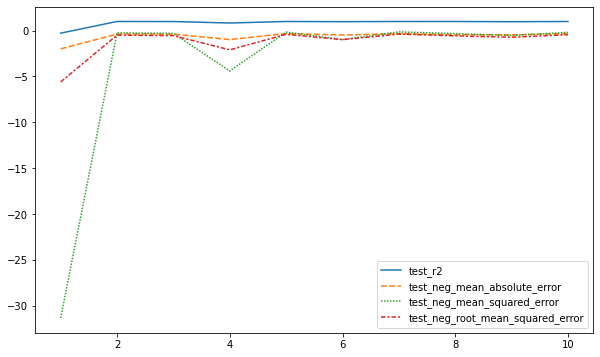

In [32]:
sns.lineplot(data = scores.iloc[:,2:]);

In [33]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [34]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge_model = Ridge(alpha=1)

In [37]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [38]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9825113234815029
MAE 		: 0.4824462638733485
MSE 		: 0.49374318166997244
RMSE 		: 0.7026686144050924


In [39]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9886773159501695
MAE 		: 0.33814926534101547
MSE 		: 0.29796950962674434
RMSE 		: 0.545865834822756


In [40]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,0.545866,0.702669
mae,0.338149,0.482446
mse,0.297970,0.493743
R2,0.988677,0.982511


In [41]:
pd.concat([ls, rs], axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,0.250934,2.575820,0.545866,0.702669
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
R2,0.997607,0.764990,0.988677,0.982511


## For Ridge Regression CV with alpha : 1 

In [42]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [43]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.978573
test_neg_mean_absolute_error       -0.441032
test_neg_mean_squared_error        -0.561648
test_neg_root_mean_squared_error   -0.666021
dtype: float64

In [44]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9825113234815029
MAE 		: 0.4824462638733485
MSE 		: 0.49374318166997244
RMSE 		: 0.7026686144050924


<AxesSubplot:>

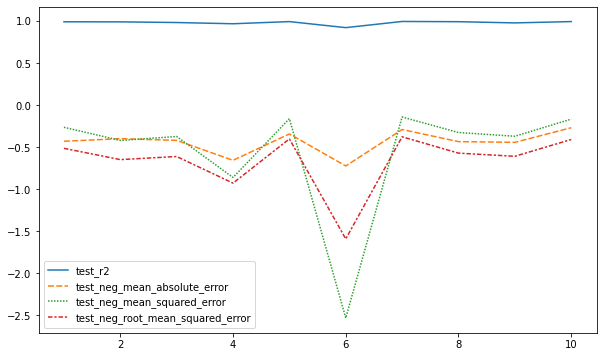

In [45]:
sns.lineplot(data = scores.iloc[:,2:])

In [46]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [47]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [48]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


## Choosing best alpha value with Cross-Validation

In [49]:
from sklearn.linear_model import RidgeCV

In [50]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [51]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error")

In [52]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [54]:
ridge_cv_model.alpha_

0.02

In [55]:
y_pred = ridge_cv_model.predict(X_test)

In [56]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9836426476759396
MAE 		: 0.4420870233388834
MSE 		: 0.4618034516011727
RMSE 		: 0.6795612199067665


In [57]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.9944909602193386
MAE 		: 0.24484201565155306
MSE 		: 0.14497674533119914
RMSE 		: 0.3807581191927483


In [58]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,0.380758,0.679561
mae,0.244842,0.442087
mse,0.144977,0.461803
R2,0.994491,0.983643


In [59]:
pd.concat([ls, rs, rcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643


In [60]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445637e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460873e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199235e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [61]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["Ridge_cv_coef_0.02"])

In [62]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


## LASSO

In [63]:
from sklearn.linear_model import Lasso, LassoCV

In [65]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [66]:
y_train_pred = lasso_model.predict(X_train)

In [67]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.919650453855065
MAE 		: 1.0183549117463373
MSE 		: 2.1144911187286946
RMSE 		: 1.4541289897147


In [68]:
y_pred = lasso_model.predict(X_test)

In [69]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9185896601157192
MAE 		: 1.0179586607877587
MSE 		: 2.2983900578631644
RMSE 		: 1.5160442136900771


In [70]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,1.454129,1.516044
mae,1.018355,1.017959
mse,2.114491,2.298390
R2,0.919650,0.918590


In [71]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590


## For Lasso CV with Default Alpha : 1

In [72]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [74]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.915992
test_neg_mean_absolute_error       -1.039070
test_neg_mean_squared_error        -2.231529
test_neg_root_mean_squared_error   -1.402208
dtype: float64

In [75]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9185896601157192
MAE 		: 1.0179586607877587
MSE 		: 2.2983900578631644
RMSE 		: 1.5160442136900771


<AxesSubplot:>

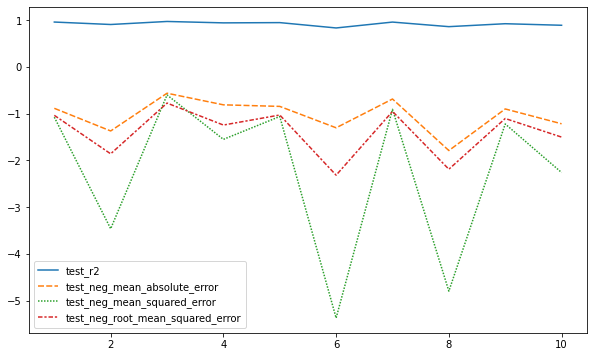

In [76]:
sns.lineplot(data = scores.iloc[:,2:])

In [77]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [78]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [79]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


### Choosing best alpha value with Cross-Validation

In [82]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000)

In [83]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [84]:
lasso_cv_model.alpha_

0.01

In [86]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9888244250353099
MAE 		: 0.33906533633271657
MSE 		: 0.2940981641252691
RMSE 		: 0.5423081818719584


In [ ]:
#Lasso(alpha =0.01)

In [87]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9862951034658218
MAE 		: 0.440975200468038
MSE 		: 0.3869188850331833
RMSE 		: 0.6220280419990591


In [88]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,0.542308,0.622028
mae,0.339065,0.440975
mse,0.294098,0.386919
R2,0.988824,0.986295


In [89]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295


In [90]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [91]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [92]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


## Elastic net

In [93]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [94]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [95]:
elastic_model.l1_ratio

0.5

In [96]:
elastic_model.alpha

1.0

In [97]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.896125980369787
MAE 		: 1.24848020328436
MSE 		: 2.733564811661118
RMSE 		: 1.6533495733392616


In [98]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9020164827239767
MAE 		: 1.2006537964645352
MSE 		: 2.766286718146463
RMSE 		: 1.6632157761837347


In [99]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.653350,1.663216
mae,1.248480,1.200654
mse,2.733565,2.766287
R2,0.896126,0.902016


In [100]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016


In [101]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [102]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [103]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


In [104]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [105]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [106]:
elastic_cv_model.alpha_

0.01

In [107]:
elastic_cv_model.l1_ratio_

1.0

In [108]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [109]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [110]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000,-0.000000


In [111]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9888244250353099
MAE 		: 0.33906533633271657
MSE 		: 0.2940981641252691
RMSE 		: 0.5423081818719584


In [112]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9862951034658218
MAE 		: 0.440975200468038
MSE 		: 0.3869188850331833
RMSE 		: 0.6220280419990591


In [113]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,0.542308,0.622028
mae,0.339065,0.440975
mse,0.294098,0.386919
R2,0.988824,0.986295


In [114]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216,0.542308,0.622028
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287,0.294098,0.386919
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016,0.988824,0.986295


## Grid Search

In [122]:
from sklearn.model_selection import GridSearchCV

In [128]:
elastic_model = ElasticNet(max_iter=10000) # model = RandomForest()

In [129]:
param_grid = {"alpha":[0.005, 0.01, 0.012, 0.015, 0.018, 0.02],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [130]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [131]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] ........................ alpha=0.005, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.005, l1_ratio=0.1 .......................................
[CV] .

[CV] .......................... alpha=0.005, l1_ratio=1, total=   0.0s
[CV] alpha=0.005, l1_ratio=1 .........................................
[CV] .......................... alpha=0.005, l1_ratio=1, total=   0.0s
[CV] alpha=0.005, l1_ratio=1 .........................................
[CV] .......................... alpha=0.005, l1_ratio=1, total=   0.0s
[CV] alpha=0.005, l1_ratio=1 .........................................
[CV] .......................... alpha=0.005, l1_ratio=1, total=   0.0s
[CV] alpha=0.005, l1_ratio=1 .........................................
[CV] .......................... alpha=0.005, l1_ratio=1, total=   0.0s
[CV] alpha=0.005, l1_ratio=1 .........................................
[CV] .......................... alpha=0.005, l1_ratio=1, total=   0.0s
[CV] alpha=0.005, l1_ratio=1 .........................................
[CV] .......................... alpha=0.005, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] .

[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] ........................... alpha=0.01, l1_ratio=1, total=   0.0s
[CV] alpha=0.01, l1_ratio=1 ..........................................
[CV] .

[CV] ....................... alpha=0.012, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.012, l1_ratio=1 .........................................
[CV] .......................... alpha=0.012, l1_ratio=1, total=   0.0s
[CV] alpha=0.012, l1_ratio=1 .........................................
[CV] .......................... alpha=0.012, l1_ratio=1, total=   0.0s
[CV] alpha=0.012, l1_ratio=1 .........................................
[CV] .......................... alpha=0.012, l1_ratio=1, total=   0.0s
[CV] alpha=0.012, l1_ratio=1 .........................................
[CV] .......................... alpha=0.012, l1_ratio=1, total=   0.0s
[CV] alpha=0.012, l1_ratio=1 .........................................
[CV] .......................... alpha=0.012, l1_ratio=1, total=   0.0s
[CV] alpha=0.012, l1_ratio=1 .........................................
[CV] .......................... alpha=0.012, l1_ratio=1, total=   0.0s
[CV] alpha=0.012, l1_ratio=1 .........................................
[CV] .

[CV] alpha=0.015, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.015, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.015, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.015, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.015, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.015, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.015, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.015, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.015, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.015, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.015, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.015, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.015, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.015, l1_ratio=0.99, total=   0.0s
[CV] a

[CV] ....................... alpha=0.018, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.018, l1_ratio=0.95 ......................................
[CV] ....................... alpha=0.018, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.018, l1_ratio=0.95 ......................................
[CV] ....................... alpha=0.018, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.018, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.018, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.018, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.018, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.018, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.018, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.018, l1_ratio=0.99 ......................................
[CV] ....................... alpha=0.018, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.018, l1_ratio=0.99 ......................................
[CV] .

[CV] ........................ alpha=0.02, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.95 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.95 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.95 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.95 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.95 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.95 .......................................
[CV] ........................ alpha=0.02, l1_ratio=0.95, total=   0.0s
[CV] alpha=0.02, l1_ratio=0.99 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    7.3s finished


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.005, 0.01, 0.012, 0.015, 0.018, 0.02],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [132]:
grid_model.best_params_

{'alpha': 0.005, 'l1_ratio': 1}

In [134]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083719,0.022466,0.000905,0.000302,0.005,0.1,"{'alpha': 0.005, 'l1_ratio': 0.1}",-0.469387,-0.608068,-0.580125,-0.978456,-0.385004,-1.498440,-0.380243,-0.508207,-0.637931,-0.345359,-0.639122,0.334942,28
1,0.028598,0.009606,0.001002,0.000447,0.005,0.5,"{'alpha': 0.005, 'l1_ratio': 0.5}",-0.467237,-0.561863,-0.483064,-0.684839,-0.361533,-1.484869,-0.375031,-0.501055,-0.644816,-0.324744,-0.588905,0.318866,13
2,0.033097,0.011662,0.000902,0.000301,0.005,0.7,"{'alpha': 0.005, 'l1_ratio': 0.7}",-0.451834,-0.532509,-0.441678,-0.596559,-0.348810,-1.463688,-0.375806,-0.496541,-0.651073,-0.304622,-0.566312,0.316246,8
3,0.023497,0.004985,0.000602,0.000491,0.005,0.9,"{'alpha': 0.005, 'l1_ratio': 0.9}",-0.437361,-0.494729,-0.412482,-0.554154,-0.345552,-1.425132,-0.381561,-0.452498,-0.643821,-0.281060,-0.542835,0.309971,4
4,0.019301,0.006290,0.000701,0.000459,0.005,0.95,"{'alpha': 0.005, 'l1_ratio': 0.95}",-0.429762,-0.483574,-0.407001,-0.548794,-0.342812,-1.411720,-0.381751,-0.434711,-0.638362,-0.272624,-0.535111,0.308048,3
5,0.025650,0.006254,0.000900,0.000300,0.005,0.99,"{'alpha': 0.005, 'l1_ratio': 0.99}",-0.422040,-0.474260,-0.405132,-0.545187,-0.338658,-1.400548,-0.384105,-0.426466,-0.638820,-0.261920,-0.529714,0.306718,2
6,0.017997,0.006527,0.000901,0.000541,0.005,1,"{'alpha': 0.005, 'l1_ratio': 1}",-0.420243,-0.471908,-0.405052,-0.543099,-0.337914,-1.397676,-0.384350,-0.425791,-0.639242,-0.262417,-0.528769,0.306032,1
7,0.032753,0.006882,0.000898,0.000300,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.539791,-0.657249,-0.576785,-0.708383,-0.399570,-1.638928,-0.376244,-0.601610,-0.595274,-0.425547,-0.651938,0.345295,32
8,0.008299,0.001616,0.000802,0.000602,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.518583,-0.592423,-0.480625,-0.580801,-0.385799,-1.624122,-0.374793,-0.600299,-0.611076,-0.384226,-0.615274,0.348006,18
9,0.007197,0.000977,0.000701,0.000459,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.506632,-0.553304,-0.443828,-0.593608,-0.387206,-1.597737,-0.376493,-0.590761,-0.625116,-0.361170,-0.603586,0.344045,15


## Using Best Model From GridSearch

In [135]:
y_pred = grid_model.predict(X_test)

In [136]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9875107727944432
MAE 		: 0.4199519502130676
MSE 		: 0.35259790931285023
RMSE 		: 0.59379955314302


## Feature importances with Ridge

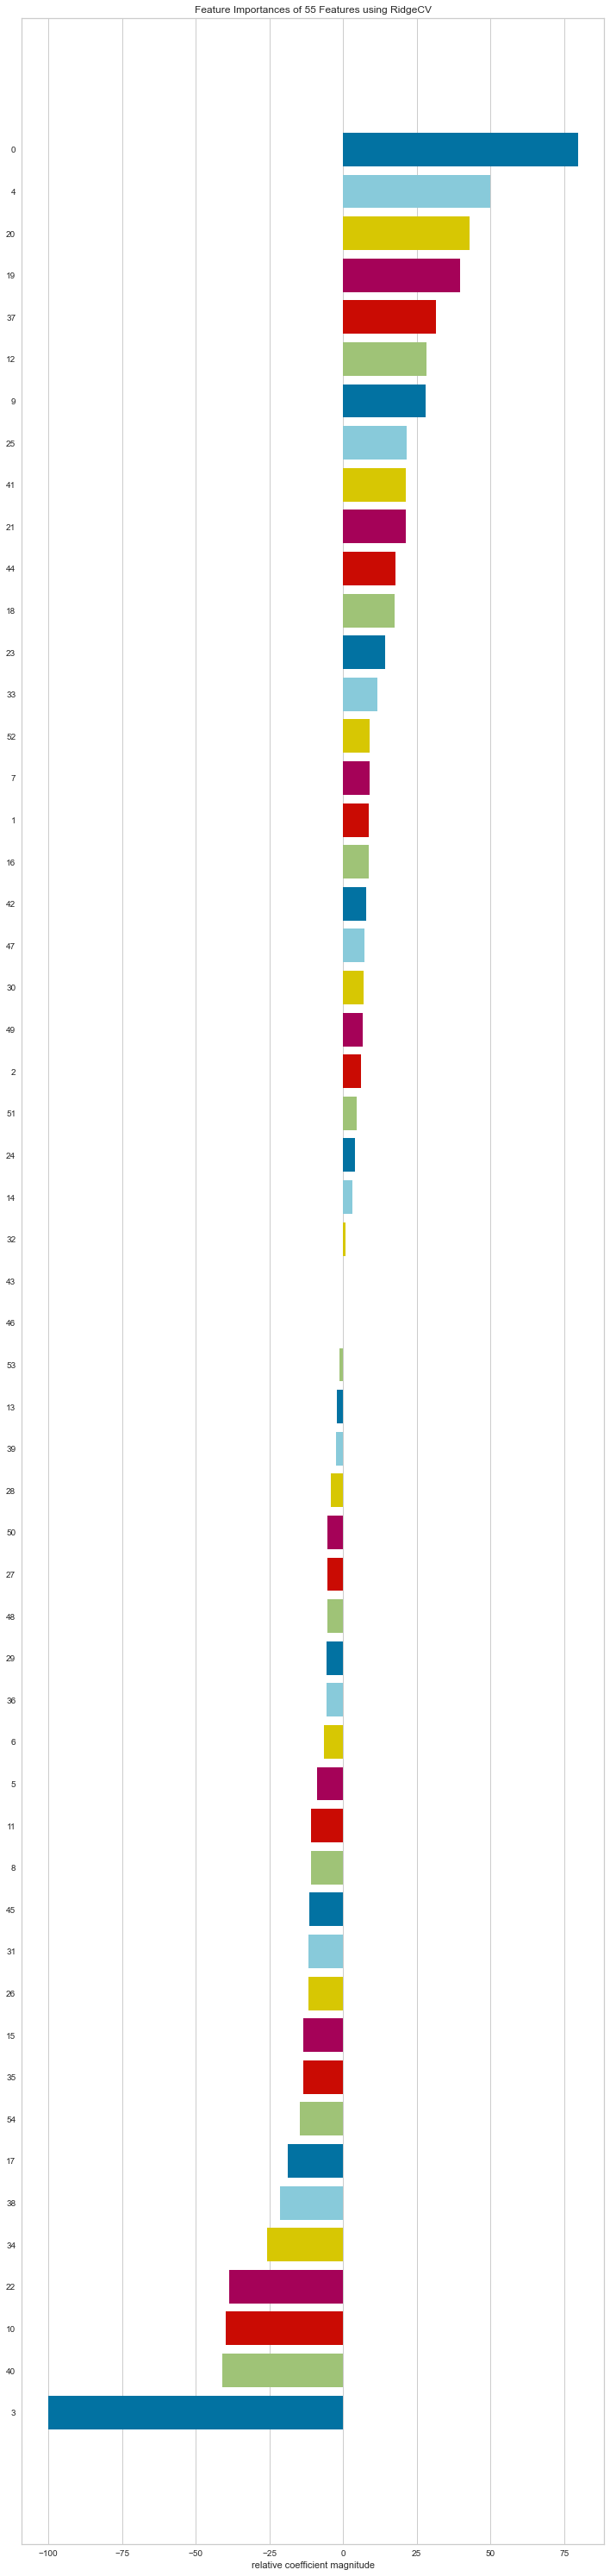

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [137]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

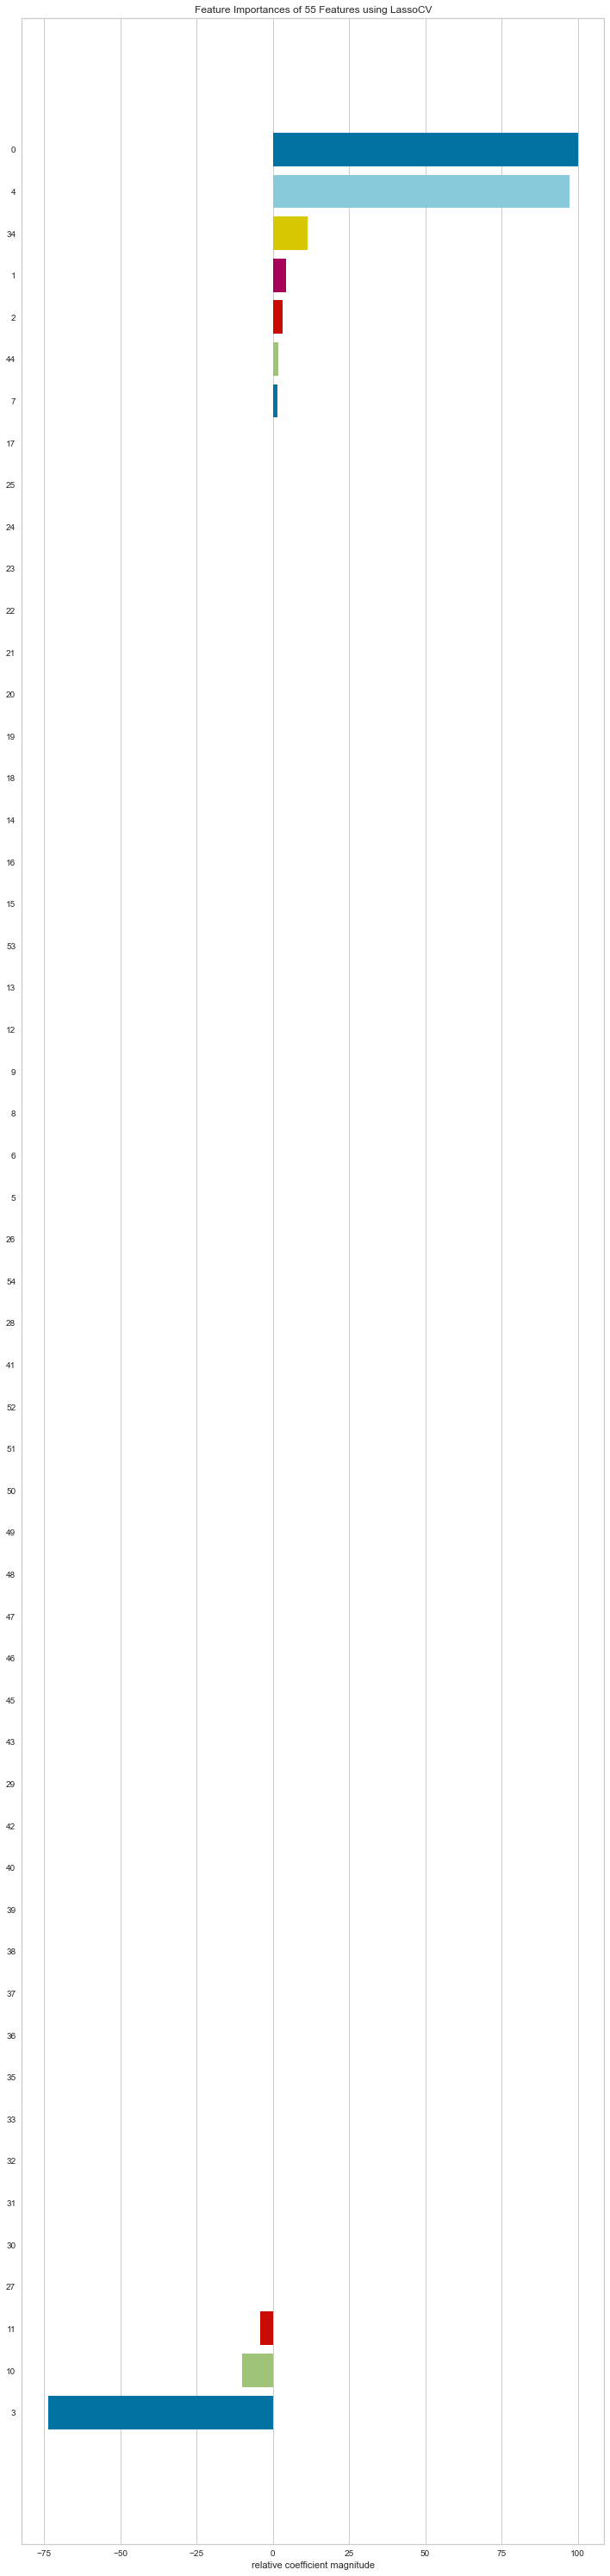

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [138]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()